<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/deepecho_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepecho
from deepecho import PARModel
import numpy as np 
import matplotlib.pyplot as plt
!pip install realdata


# Demonstration of DeepEcho synthetic time series generation
Follows https://pypi.org/project/deepecho/
For more "hello world" examples of time series packages see
[listing by downloads](https://www.microprediction.com/blog/popular-timeseries-packages).

## Get some real world time series
Pulls live wriggly time series from [here](https://www.microprediction.org/browse_streams.html)

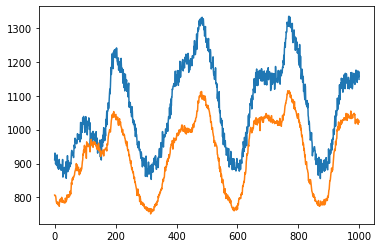

In [26]:
from realdata import get_values
num = 0
while num<500:
    y1 = get_values()
    y2 = get_values()
    num = min(len(y1),len(y2))
    y1 = y1[-num:]
    y2 = y2[-num:]

plt.plot(range(num),y1,range(num),y2)
# Don't like? just run again

## Massage

In [27]:
import pandas as pd
df = pd.DataFrame(columns=['day','price','category'])
df['price'] = y1 + y2
df['category'] = ['dog']*num+['cat']*num
df['day'] = list(range(num)) + list(range(num))
df[:2]

,day,price,category
0,0,911.3140,dog
1,1,930.9901,dog


## Fit with deepecho

In [17]:
data_types = {
    'price': 'continuous',
}
model = PARModel(cuda=False)
model.fit(
    data=df,
    entity_columns=['category'],
    data_types=data_types,
    sequence_index='day'
)

  0%|          | 0/128 [00:00<?, ?it/s]

PARModel(epochs=128, sample_size=1, cuda='cpu', verbose=True) instance created


Epoch 128 | Loss -28.850357055664062: 100%|██████████| 128/128 [01:18<00:00,  1.62it/s]


## Then simulate

In [28]:
fake_data = model.sample(num_entities=3)
fake_data[:3]

100%|██████████| 3/3 [00:55<00:00, 18.46s/it]


,price,category
0,25.454000,0.0
1,10.017825,0.0
2,-0.989103,0.0
3,4.442291,0.0
4,3.623879,0.0
5,1.235216,0.0
6,3.190608,0.0
7,0.218730,0.0
8,0.594444,0.0
9,7.315282,0.0


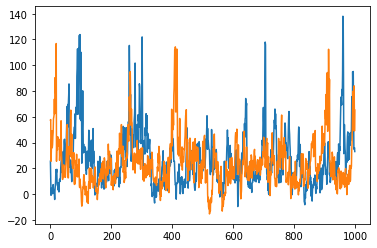

In [33]:
fake1 = fake_data[fake_data.category==0].price
fake2 = fake_data[fake_data.category==1].price
days = list(range(len(fake1)))
plt.plot(days,fake1,days,fake2)